# Modeling: 

## Random Forests Regression

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. View and Visualize our dependent variable 'price'](#3._View_and_Visualize_our_dependent_variable_price)
    * [3.1 View the data](#3.1_View_the_data)
    * [3.2 Final Visualization of our dependent Variable 'price'](#3.2_Final_Visualization_of_our_dependent_variable_price)
 * [4. Features Selection: Define/Select Features](#4_Features_Selection:_Define_Select_Features)
 * [5. Train/Test Split](#5_Train/Test_Split)
 * [6. Scaling and Transformation: Standardization](#6_Scaling_and_Transformation:_Standardization)
 * [7. Modeling: Random Forests Regression](#7_Random_Forests_Regression)
    * [7.1 Fitting Random Forests Regression](#7.1_Fitting_Random_Forests_Regression)
    * [7.2 Random Forests Regression: Residuals Visualization](#7.2_Random_Forests_Regression:_Residuals_Visualization)
    * [7.3 Random Forests Regression Model Evaluation](#7.3_Random_Forests_Regression_Model_Evaluation)
    * [7.4 Features Selection](#7.4_Features_Selection)
       * [7.4.1 Features Importance](#7.4.1_Features_Importance)
       * [7.4.2 Keeping high important Features Only](#7.4.2_Keeping_high_important_Features_Only)
       * [7.4.3 Features Selection Summary](#7.4.3_Features_Selection_Summary)    
    * [7.5 Hyperparameters Tuning: RandomizedSearchCV](#7.5_Hyperparameters_Tuning:_RandomizedSearchCV)
       * [7.5.1 RandomizedSearchCV for all features](#7.5.1_RandomizedSearchCV_for_all_features)
       * [7.5.2 Fitting Random Forests Regression after RandomizedSearchCV (All features)](#7.5.2_Fitting_Random_Forests_Regression_after_RandomizedSearchCV_(All_features))
       * [7.5.3 RandomizedSearchCV for high important Features Only](#7.5.3_RandomizedSearchCV_for_high_important_features_only)
       * [7.5.4 Fitting Random Forests Regression after RandomizedSearchCV High important features)](#7.5.4_Fitting_Random_Forests_Regression_after_RandomizedSearchCV_(High_important_features)) 
 * [8. Random Forests Regression Tuning Summary](#8_Random_Forests_Regression_Tuning_Summary)
 * [9. Random Forests Regression Actual vs Prediction Visualization](#9_Random_Forests_Regression_Actual_vs_Prediction_Visualization)
 * [10. Models next step](#10_Models_next_step)

## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Dummy Regression (Baseline Model)
 * Linear Regression
 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Light GBM
 * Artificial Neural networks (ANN).
 * Stacking
 
 
 **In This Notebook, We'll be using Random Forests**



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [10]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [ ]:
# List files/folders in the cd:
os.listdir()

In [13]:
df = pd.read_csv('pre_processing_df_main_two.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [9]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 6002 and Columns:  29


In [10]:
#Let's check the df shape:
df.head()

,property_type,zipcode,beds,baths,sqft,price,lot_size,days_on_market,price_per_sqft,hoa_month,...,university_count,barts,malls,universities,bedBath,AvgRoomSize,cluster_label,median_price_sqft_cluster,gsRating,distance_miles
0,1,94568,3,4,1994,905000,0,80,454,388.0,...,0,1,0,0,12,284.857,205,441.5,8.714286,2.267857
1,0,94568,4,4,3083,1250000,3058,143,405,232.0,...,0,1,0,0,16,385.375,205,441.5,8.714286,2.250000
2,0,94568,4,4,3180,1290000,4477,123,406,232.0,...,0,1,0,0,16,397.500,205,441.5,8.714286,2.227857
3,0,94568,4,2,2069,1105000,2851,21,534,237.0,...,0,1,0,0,8,344.833,205,441.5,8.909091,2.097273
4,2,94568,3,2,1387,725000,5806,51,523,325.0,...,0,1,0,0,6,277.400,274,551.0,7.333333,2.338333


In [11]:
# Summary Statistics:
df.describe()['price'].round(2)

count       6002.00
mean      867244.88
std       380264.13
min       165000.00
25%       579898.75
50%       790000.00
75%      1100000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


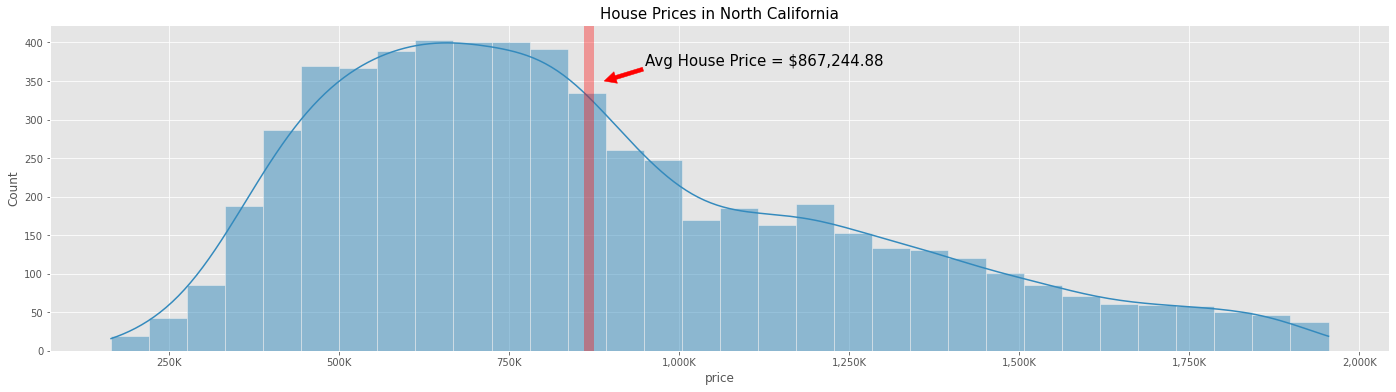

In [12]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $867,244.88', xy=(890000, 350), xytext=(950000, 370), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Features Selection: Define/Select Features<a id='4_Features_Selection:_Define/Select_Features'></a>


In [13]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'price',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'university_count', 'barts', 'malls', 'universities', 'bedBath',
       'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
       'distance_miles'],
      dtype='object')

In [14]:
# Let's define/select our features:
# Let's define/select our features: removing only 'price_per_sqft':
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 
           'lot_size', 'days_on_market', 'hoa_month', 'lat',
           'long', 'property_age', 'school_rating', 'school_count',
           'median_income', 'hotness_score', 'supply_score', 'demand_score',
           'university_count', 'barts', 'malls', 'universities', 'bedBath',
           'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
           'distance_miles']
# And, Now let's define X and y:
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [16]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


## 7. Modeling: Random Forests Regression<a id='7_Random_Forests_Regression'></a>

**Random Forest** is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.
Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

A RandomForestRegressor has all the hyperparameters of:
  * **DecisionTreeRegressor** (to control how trees are grown).
  * **BaggingRegressor** to control the ensemble itself.

The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. 


**Further Diveristy with Random Forests:**
  * Random Forests is an ensemble method that uses a decision tree as a base estimator. 
  * Each estimator is trained on a different bootstrap sample having the same size as the training set. 
  * RF introduces further randomization than bagging when training each of the base estimators. 
  * When each tree is trained, only d features can be sampled at each node without replacement, where d is a number smaller than the total number of features.

### 7.1 Fitting  Random Forests Regression<a id='7.1_Fitting_Random_Forests_Regression'></a>


In [17]:
# Import necessary modules
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor: rfg
# Default: max_depth=None, n_estimators=100
rfg = RandomForestRegressor(random_state=1981) 

# Fit the regressor to the training data
rfg.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(rfg.score(X_test, y_test) * 100), '%')

R^2 coefficient : 91.4367 %


In [18]:
# Predict on the test data: y_pred_dtg
y_pred_rfg = rfg.predict(X_test)

### 7.2 Random Forests Regression: Residuals Visualization<a id='7.2_Random_Forests_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

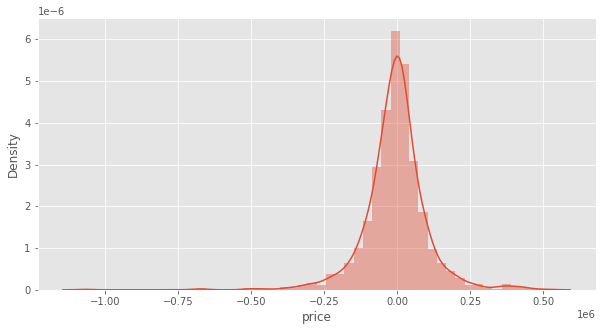

In [19]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_rfg)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 7.3 Random Forests Regression Model Evaluation<a id='7.3_Random_Forests_Regression_Model_Evaluation'></a>

In [20]:
from sklearn import metrics

print("********Random Forests Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_rfg) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_rfg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_rfg)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_rfg) * 100), '%')
print("-------------------------------------------------")

********Random Forests Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 91.4367 %
-------------------------------------------------------------
Adjusted R^2 Score: 91.2797 %
-------------------------------------------------
MAE: 71881.2010
-------------------------------------------------
RMSE:110118.6979
-------------------------------------------------
Variance Score:91.4562 %
-------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 110,118.6979**, which is slightly higher than 12% of the mean value of the Sales Price i.e.  $867,244.88. 


### 7.4 Features Selection<a id='7.4_Features_Selection'></a>

As shown below let's try to improve predictions by keeping high importants features only: 

#### 7.4.1 Features Importance<a id='7.4.1_Features_Importance'></a> 


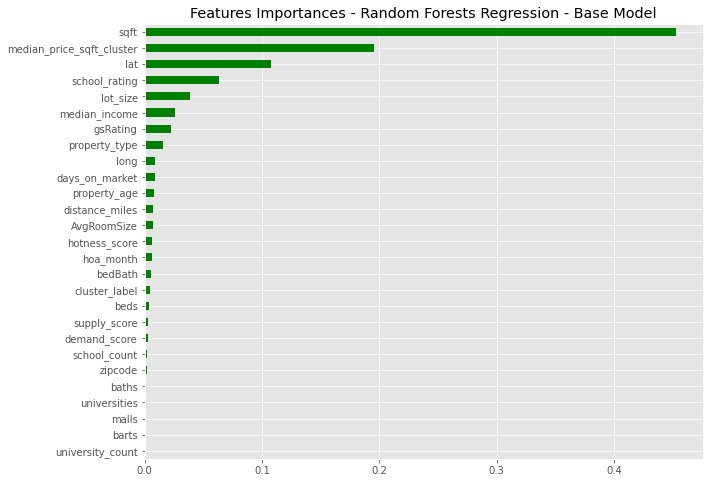

In [21]:
# First, let's create a pd.Series of features importances
importances_rfg = pd.Series(data=rfg.feature_importances_, index=X.columns)

# Sort importances
importances_sorted = importances_rfg.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - Random Forests Regression - Base Model')
plt.grid(True)
plt.show()

**Dropping Features:**
based on above Features importance, let's keep only 'property_type',  'beds', 'baths', 'sqft', 'zipcode', 'lot_size', 'days_on_market', 'hoa_month', 'lat',
'long', 'property_age', 'gsRating','median_income' and 'university_count', 'malls','median_price_sqft_cluster'.

 
#### 7.4.2 Keeping high important Features Only<a id='7.4.2_Keeping_high_important_Features_Only'></a> 

In [58]:
# So Now, Let's re define/select our features and keep only high Coefficients:
features = ['property_type',  'beds', 'baths', 'sqft', 'zipcode',
            'lot_size', 'days_on_market', 'hoa_month', 'lat',
            'long', 'property_age', 'gsRating','median_income',
            'university_count', 'malls','median_price_sqft_cluster'] 

# And, Now let's define X and y:
X = df[features]
y = df.price

In [59]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [60]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [61]:
# Create a RandomForestRegressor: rfg_2
# Default: max_depth=None, n_estimators=100
rfg_2 = RandomForestRegressor(random_state=1981) 

# Fit the regressor to the training data
rfg_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(rfg_2.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_rfg_2
y_pred_rfg_2 = rfg_2.predict(X_test)

R^2 coefficient : 91.4910 %


In [27]:
print("********Tuned Random Forests Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_rfg_2) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_rfg_2))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_rfg_2)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg_2))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_rfg_2) * 100), '%')
print("-------------------------------------------------")

********Tuned Random Forests Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 91.4910 %
-------------------------------------------------------------
Adjusted R^2 Score: 91.3993 %
-------------------------------------------------
MAE: 72011.8407
-------------------------------------------------
RMSE:109768.5543
-------------------------------------------------
Variance Score:91.5134 %
-------------------------------------------------


#### 7.4.3 Features Selection Summary<a id='7.4.3_Features_Selection_Summary'></a>

As we can see below, when we're keeping the high important features: we're seeing the best Result for Random Forests Regression:


|Features Selection| R^2 Score|Adjusted R^2 Score  |  MAE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|91.4367 %|91.2797 %|71881.2010|110118.6979|91.4562 %|
|Keeping high important Features    |91.4910 %|91.3993 %|72011.8407|109768.5543|91.5134 %|

### 7.5 Hyperparameters Tuning: RandomizedSearchCV<a id='7.5_Hyperparameters_Tuning:_RandomizedSearchCV'></a>

#### 7.5.1 RandomizedSearchCV for all features:<a id='7.5.1_RandomizedSearchCV_for_all_features'></a>

In [62]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 
           'lot_size', 'days_on_market', 'hoa_month', 'lat',
           'long', 'property_age', 'school_rating', 'school_count',
           'median_income', 'hotness_score', 'supply_score', 'demand_score',
           'university_count', 'barts', 'malls', 'universities', 'bedBath',
           'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
           'distance_miles']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [29]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

max_depth = [None, 5, 7, 9, 11, 13, 15, 17, 20] # Default: max_depth=None
n_estimators = range(100, 1000, 100) # Default: n_estimators=100
min_samples_split = range(2, 32, 2) # default=2
min_samples_leaf = range(1, 35, 5) # Default =1
max_features = ['auto', 'sqrt', 'log2'] #Default='auto'



# Set the parameters by cross-validation
params = [{'max_depth': max_depth,
          'n_estimators': n_estimators,
          'min_samples_split' : min_samples_split,
          'min_samples_leaf' : min_samples_leaf,
          'max_features': max_features}]

# Create a RandomForestRegressor regressor: rfg_search_1
rfg_search_1 = RandomForestRegressor(random_state=1981) 

#cross validation
folds = 3

# Setup the RandomizedSearchCV object: rfg_cv_all
rfg_cv_all = RandomizedSearchCV(estimator = rfg_search_1, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 200, cv = folds, n_jobs=1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
rfg_cv_all.fit(X_train, y_train)



Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END max_depth=17, max_features=log2, min_samples_leaf=16, min_samples_split=26, n_estimators=500; total time=   1.4s
[CV] END max_depth=17, max_features=log2, min_samples_leaf=16, min_samples_split=26, n_estimators=500; total time=   1.4s
[CV] END max_depth=17, max_features=log2, min_samples_leaf=16, min_samples_split=26, n_estimators=500; total time=   1.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=14, n_estimators=500; total time=   1.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=14, n_estimators=500; total time=   1.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=11, min_samples_split=14, n_estimators=500; total time=   1.5s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=26, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=26, min_samples_sp

[CV] END max_depth=13, max_features=log2, min_samples_leaf=26, min_samples_split=2, n_estimators=900; total time=   3.1s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=26, n_estimators=300; total time=   1.2s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=26, n_estimators=300; total time=   1.2s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=26, n_estimators=300; total time=   1.2s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=26, min_samples_split=6, n_estimators=400; total time=   1.4s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=26, min_samples_split=6, n_estimators=400; total time=   1.6s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=26, min_samples_split=6, n_estimators=400; total time=   1.5s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=11, min_samples_split=20, n_estimators=200; total time=   0.7s
[CV] END max_depth=7, max_featur

[CV] END max_depth=7, max_features=auto, min_samples_leaf=21, min_samples_split=24, n_estimators=300; total time=   4.3s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=21, min_samples_split=24, n_estimators=300; total time=   3.8s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=18, n_estimators=700; total time=   2.5s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=18, n_estimators=700; total time=   2.8s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=18, n_estimators=700; total time=   2.9s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=500; total time=   2.3s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=500; total time=   2.2s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=6, min_samples_split=16, n_estimators=500; total time=   2.1s
[CV] END max_depth=13, max_featu

[CV] END max_depth=9, max_features=auto, min_samples_leaf=16, min_samples_split=14, n_estimators=600; total time=   9.7s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=16, min_samples_split=14, n_estimators=600; total time=   9.9s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=16, min_samples_split=14, n_estimators=600; total time=   9.6s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=31, min_samples_split=18, n_estimators=600; total time=   1.6s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=31, min_samples_split=18, n_estimators=600; total time=   2.2s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=31, min_samples_split=18, n_estimators=600; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=20, n_estimators=500; total time=   2.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=11, min_samples_split=20, n_estimators=500; total time=   2.1s
[CV] END max_depth=20, max_fea

[CV] END max_depth=11, max_features=auto, min_samples_leaf=31, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=600; total time=   2.5s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   2.8s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   2.2s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=400; total time=   1.7s
[CV] END max_depth=5, max_features=sq

[CV] END max_depth=None, max_features=log2, min_samples_leaf=21, min_samples_split=22, n_estimators=900; total time=   2.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=21, min_samples_split=22, n_estimators=900; total time=   2.6s
[CV] END max_depth=13, max_features=auto, min_samples_leaf=16, min_samples_split=24, n_estimators=500; total time=   7.2s
[CV] END max_depth=13, max_features=auto, min_samples_leaf=16, min_samples_split=24, n_estimators=500; total time=   7.0s
[CV] END max_depth=13, max_features=auto, min_samples_leaf=16, min_samples_split=24, n_estimators=500; total time=   6.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.7s
[CV] END max_depth=None, m

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=24, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=24, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=24, n_estimators=100; total time=   0.8s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   3.3s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   3.7s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=31, min_samples_split=30, n_estimators=800; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=31, min_samples_split=30, n_estimators=800; total time=   2.0s
[CV] END max_depth=5, max_features=sqr

[CV] END max_depth=20, max_features=log2, min_samples_leaf=21, min_samples_split=16, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=11, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   1.4s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   1.4s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300; total time=   1.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=21, min_samples_split=12, n_estimators=100; total time=   1.5s
[CV] END max_depth=15, max_featur

[CV] END max_depth=7, max_features=log2, min_samples_leaf=21, min_samples_split=20, n_estimators=200; total time=   0.7s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=21, min_samples_split=20, n_estimators=200; total time=   0.7s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=26, min_samples_split=10, n_estimators=700; total time=   3.1s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=26, min_samples_split=10, n_estimators=700; total time=   3.1s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=26, min_samples_split=10, n_estimators=700; total time=   2.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=26, min_samples_split=8, n_estimators=500; total time=   7.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=26, min_samples_split=8, n_estimators=500; total time=   6.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=26, min_samples_split=8, n_estimators=500; total time=   6.7s
[CV] END max_depth=15, max_featu

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1981),
                   n_iter=200, n_jobs=1,
                   param_distributions=[{'max_depth': [None, 5, 7, 9, 11, 13,
                                                       15, 17, 20],
                                         'max_features': ['auto', 'sqrt',
                                                          'log2'],
                                         'min_samples_leaf': range(1, 35, 5),
                                         'min_samples_split': range(2, 32, 2),
                                         'n_estimators': range(100, 1000, 100)}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=2)

In [30]:
#checking the value of optimum number of parameters
print("Tuned Random Forest Regression Parameters: {}".format(rfg_cv_all.best_params_))
print("Tuned Random Forest - Best neg_mean_squared_error Score is {:.4f}".format(rfg_cv_all.best_score_))

Tuned Random Forest Regression Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Tuned Random Forest - Best neg_mean_squared_error Score is -12659124301.8431


In [32]:
cv_results = pd.DataFrame(rfg_cv_all.cv_results_)
cv_results.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mean_fit_time,200.0,3.780000e+00,4.050000e+00,3.000000e-01,1.230000e+00,2.170000e+00,3.900000e+00,1.697000e+01
std_fit_time,200.0,2.000000e-01,3.000000e-01,0.000000e+00,2.000000e-02,9.000000e-02,2.400000e-01,1.630000e+00
mean_score_time,200.0,7.500000e-01,9.200000e+00,1.000000e-02,5.000000e-02,9.000000e-02,1.400000e-01,1.302300e+02
std_score_time,200.0,9.300000e-01,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,1.837900e+02
split0_test_score,200.0,-1.619863e+10,1.978640e+09,-2.238867e+10,-1.706285e+10,-1.603225e+10,-1.482091e+10,-1.229311e+10
split1_test_score,200.0,-1.866501e+10,2.850579e+09,-2.715155e+10,-2.081002e+10,-1.837810e+10,-1.632925e+10,-1.324522e+10
split2_test_score,200.0,-1.675740e+10,2.550978e+09,-2.515867e+10,-1.844991e+10,-1.634105e+10,-1.459235e+10,-1.243905e+10
mean_test_score,200.0,-1.720701e+10,2.429345e+09,-2.489963e+10,-1.882352e+10,-1.675249e+10,-1.527467e+10,-1.265912e+10
std_test_score,200.0,1.105359e+09,4.166648e+08,2.952943e+08,7.737111e+08,9.975183e+08,1.493201e+09,1.953047e+09
rank_test_score,200.0,1.003900e+02,5.783000e+01,1.000000e+00,5.075000e+01,1.005000e+02,1.502500e+02,2.000000e+02


#### 7.5.2 Fitting Random Forests Regression after RandomizedSearchCV (All features)<a id='7.5.2_Fitting_Random_Forests_Regression_after_RandomizedSearchCV_(All_features)'></a>

In [66]:
#(Best RandomizedSearchCV)
max_depth = 20 
n_estimators = 300
min_samples_split = 2 # this is the default
min_samples_leaf = 1 # this is the default
max_features = 'sqrt'

# Create a RandomForestRegressor: rfg_tuned_cv_1
rfg_tuned_cv_1 = RandomForestRegressor(n_estimators = n_estimators, 
                                       max_depth=max_depth,
                                       max_features=max_features,
                                       random_state=1981)

# Fit the regressor to the training data
rfg_tuned_cv_1.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_final : {:.4f}".format(rfg_tuned_cv_1.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_rfg_cv_1
y_pred_rfg_cv_1 = rfg_tuned_cv_1.predict(X_test)


R-Squared coefficient Tuned_final : 91.9673 %


In [33]:
print("********Tuned Random Forests Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_rfg_cv_1) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_rfg_cv_1))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_rfg_cv_1)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg_cv_1))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_rfg_cv_1) * 100), '%')
print("-------------------------------------------------")

********Tuned Random Forests Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 91.9673 %
-------------------------------------------------------------
Adjusted R^2 Score: 91.8201 %
-------------------------------------------------
MAE: 68595.6250
-------------------------------------------------
RMSE:106652.1579
-------------------------------------------------
Variance Score:91.9863 %
-------------------------------------------------


#### 7.5.3 RandomizedSearchCV for high important Features Only<a id='7.5.3_RandomizedSearchCV_for_high_important_features_only'></a> 

In [14]:
# Let's define/select our features:
features = ['property_type',  'beds', 'baths', 'sqft', 'zipcode',
            'lot_size', 'days_on_market', 'hoa_month', 'lat',
            'long', 'property_age', 'gsRating','median_income',
            'university_count', 'malls','median_price_sqft_cluster'] 

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [35]:
max_depth = [None, 5, 7, 9, 11, 13, 15, 17, 20] # Default: max_depth=None
n_estimators = range(100, 1000, 100) # Default: n_estimators=100
min_samples_split = range(2, 32, 2) # default=2
min_samples_leaf = range(1, 35, 5) # Default =1
max_features = ['auto', 'sqrt', 'log2'] #Default='auto'



# Set the parameters by cross-validation
params = [{'max_depth': max_depth,
          'n_estimators': n_estimators,
          'min_samples_split' : min_samples_split,
          'min_samples_leaf' : min_samples_leaf,
          'max_features': max_features}]

# Create a RandomForestRegressor regressor: rfg_search_2
rfg_search_2 = RandomForestRegressor(random_state=1981) 

#cross validation
folds = 3

# Setup the RandomizedSearchCV object: rfg_cv_2
rfg_cv_2 = RandomizedSearchCV(estimator = rfg_search_2, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 200, cv = folds, n_jobs=1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
rfg_cv_2.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=16, min_samples_split=22, n_estimators=800; total time=   2.4s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=16, min_samples_split=22, n_estimators=800; total time=   2.3s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=16, min_samples_split=22, n_estimators=800; total time=   2.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=16, min_samples_split=22, n_estimators=300; total time=   2.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=16, min_samples_split=22, n_estimators=300; total time=   2.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=16, min_samples_split=22, n_estimators=300; total time=   2.8s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=11, min_samples_split=20, n_estimators=100; total time=   0.8s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=11, min_samples_split=20, n_e

[CV] END max_depth=None, max_features=auto, min_samples_leaf=16, min_samples_split=22, n_estimators=400; total time=   3.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=16, min_samples_split=22, n_estimators=400; total time=   3.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=31, min_samples_split=16, n_estimators=300; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=31, min_samples_split=16, n_estimators=300; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=31, min_samples_split=16, n_estimators=300; total time=   1.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=11, min_samples_split=8, n_estimators=700; total time=   5.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=11, min_samples_split=8, n_estimators=700; total time=   4.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=11, min_samples_split=8, n_estimators=700; total time=   4.7s
[CV] END max_depth=17, max

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   3.7s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   4.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=600; total time=   5.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=26, min_samples_split=12, n_estimators=200; total time=   2.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=26, min_samples_split=12, n_estimators=200; total time=   2.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=26, min_samples_split=12, n_estimators=200; total time=   3.4s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=16, min_samples_split=28, n_estimators=900; total time=   5.4s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=16, min_samples_split=28, n_estimators=900; total time=   4.1s
[CV] END max_depth=7, max_

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=16, min_samples_split=10, n_estimators=700; total time=   7.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=700; total time=   4.6s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=700; total time=   4.9s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=6, min_samples_split=20, n_estimators=700; total time=   5.6s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=16, min_samples_split=14, n_estimators=200; total time=   3.2s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=16, min_samples_split=14, n_estimators=200; total time=   3.0s
[CV] END max_depth=17, max_features=auto, min_samples_leaf=16, min_samples_split=14, n_estimators=200; total time=   3.8s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=900; total time=   6.3s
[CV] END max_depth=17, max_featu

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=26, n_estimators=600; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=26, n_estimators=600; total time=   2.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=31, min_samples_split=16, n_estimators=100; total time=   1.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=31, min_samples_split=16, n_estimators=100; total time=   1.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=31, min_samples_split=16, n_estimators=100; total time=   1.9s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=31, min_samples_split=30, n_estimators=600; total time=   3.1s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=31, min_samples_split=30, n_estimators=600; total time=   3.1s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=31, min_samples_split=30, n_estimators=600; total time=   2.5s
[CV] END max_depth=13, max

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=31, min_samples_split=26, n_estimators=600; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=31, min_samples_split=26, n_estimators=600; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=31, min_samples_split=26, n_estimators=600; total time=   3.2s
[CV] END max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=900; total time=   5.4s
[CV] END max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=900; total time=   5.6s
[CV] END max_depth=11, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=900; total time=   4.8s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=21, min_samples_split=4, n_estimators=600; total time=  10.4s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=21, min_samples_split=4, n_estimators=600; total time=   7.6s
[CV] END max_depth=9, max_featu

[CV] END max_depth=17, max_features=log2, min_samples_leaf=6, min_samples_split=12, n_estimators=200; total time=   1.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=16, min_samples_split=4, n_estimators=700; total time=   2.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=16, min_samples_split=4, n_estimators=700; total time=   2.0s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=16, min_samples_split=4, n_estimators=700; total time=   2.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=700; total time=   2.7s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=700; total time=   2.7s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=700; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=16, min_samples_split=26, n_estimators=500; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, 

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=300; total time=   2.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=16, min_samples_split=6, n_estimators=300; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=31, min_samples_split=26, n_estimators=500; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=31, min_samples_split=26, n_estimators=500; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=31, min_samples_split=26, n_estimators=500; total time=   1.6s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=31, min_samples_split=6, n_estimators=300; total time=   1.2s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=31, min_samples_split=6, n_estimators=300; total time=   1.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=31, min_samples_split=6, n_estimators=300; total time=   0.9s
[CV] END max_depth=11, max_feat

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=22, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=22, n_estimators=500; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=11, min_samples_split=22, n_estimators=500; total time=   1.4s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=   4.4s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=   4.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=900; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=16, min_samples_split=28, n_estimators=600; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=16, min_samples_split=28, n_estimators=600; total time=   1.6s
[CV] END max_depth=5, max_features=

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1981),
                   n_iter=200, n_jobs=1,
                   param_distributions=[{'max_depth': [None, 5, 7, 9, 11, 13,
                                                       15, 17, 20],
                                         'max_features': ['auto', 'sqrt',
                                                          'log2'],
                                         'min_samples_leaf': range(1, 35, 5),
                                         'min_samples_split': range(2, 32, 2),
                                         'n_estimators': range(100, 1000, 100)}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
#checking the value of optimum number of parameters
print("Tuned Random Forests Regression Parameters: {}".format(rfg_cv_2.best_params_))
print("Tuned Random Forests - Best neg_mean_squared_error score is {:.4f}".format(rfg_cv_2.best_score_))

Tuned Random Forests Regression Parameters: {'n_estimators': 600, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Tuned Random Forests - Best neg_mean_squared_error score is -12553774011.5550


In [38]:
cv_results = pd.DataFrame(rfg_cv_2.cv_results_)
cv_results.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mean_fit_time,200.0,3.170000e+00,2.800000e+00,2.900000e-01,1.400000e+00,2.460000e+00,3.940000e+00,2.204000e+01
std_fit_time,200.0,3.200000e-01,4.500000e-01,0.000000e+00,7.000000e-02,1.600000e-01,3.500000e-01,3.160000e+00
mean_score_time,200.0,1.100000e-01,8.000000e-02,2.000000e-02,6.000000e-02,1.000000e-01,1.500000e-01,7.000000e-01
std_score_time,200.0,2.000000e-02,3.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,2.000000e-02,3.600000e-01
split0_test_score,200.0,-1.631370e+10,2.221233e+09,-2.170436e+10,-1.746097e+10,-1.613128e+10,-1.471657e+10,-1.217141e+10
split1_test_score,200.0,-1.841544e+10,3.039178e+09,-2.594777e+10,-2.064455e+10,-1.811094e+10,-1.605373e+10,-1.320568e+10
split2_test_score,200.0,-1.650222e+10,2.738119e+09,-2.339311e+10,-1.820079e+10,-1.612172e+10,-1.428538e+10,-1.228423e+10
mean_test_score,200.0,-1.707712e+10,2.642192e+09,-2.368175e+10,-1.872098e+10,-1.671200e+10,-1.510819e+10,-1.255377e+10
std_test_score,200.0,1.007078e+09,3.579291e+08,4.413327e+08,6.770099e+08,9.428539e+08,1.331641e+09,1.751837e+09
rank_test_score,200.0,1.003600e+02,5.784000e+01,1.000000e+00,5.075000e+01,1.005000e+02,1.487500e+02,2.000000e+02


#### 7.5.4 Fitting Random Forests Regression after RandomizedSearchCV (High important features)<a id='7.5.4_Fitting_Random_Forests_Regression_after_RandomizedSearchCV_(High_important_features)'></a>

In [30]:
# Import necessary modules
from sklearn.ensemble import RandomForestRegressor

#(Best RandomizedSearchCV)
max_depth = None # this is the default
n_estimators = 600
min_samples_split = 6 
min_samples_leaf = 1 # this is the default
max_features = 'log2'

# Create a RandomForestRegressor: rfg_tuned_cv_2
rfg_tuned_cv_2 = RandomForestRegressor(max_depth=max_depth,
                                       n_estimators = n_estimators, 
                                       min_samples_split=min_samples_split,
                                       max_features=max_features,
                                       random_state=1981)

# Fit the regressor to the training data
rfg_tuned_cv_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_final : {:.4f}".format(rfg_tuned_cv_2.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_rfg_cv_2
y_pred_rfg_cv_2 = rfg_tuned_cv_2.predict(X_test)

R-Squared coefficient Tuned_final : 92.1982 %


In [27]:
from sklearn import metrics

print("********Tuned Random Forests Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_rfg_cv_2) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_rfg_cv_2))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_rfg_cv_2)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg_cv_2))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_rfg_cv_2) * 100), '%')
print("-------------------------------------------------")

********Tuned Random Forests Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 92.1982 %
-------------------------------------------------------------
Adjusted R^2 Score: 92.1141 %
-------------------------------------------------
MAE: 67886.0897
-------------------------------------------------
RMSE:105107.8895
-------------------------------------------------
Variance Score:92.2170 %
-------------------------------------------------


## 8. Random Forests Regression Tuning Summary<a id='8_Random_Forests_Regression_Tuning_Summary'></a>

As we can see below, We managed to improve our Random Forests Regression Model by:
 * keeping only the high important features:  and
 * Hyperparameters Tuning using RandomizedSearchCV to determine best:
   * {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 20} when considering all features.
   * {'n_estimators': 600, 'min_samples_split': 6, 'max_features': 'log2'} when considering only the highimportant features
 * Variance Score has improved from 91.4562 % (Random Forests - baseline) to 92.2170 %.

|Features Selection| R^2 Score|Adjusted R^2 Score  |  MAE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|91.4367 %|91.2797 %|71881.2010|110118.6979|91.4562 %|
|Baseline (Keeping high important Features)  |91.4910 %|91.3993 %|72011.8407|109768.5543|91.5134 %|
|All Features + RandomizedSearchCV {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 20}|91.9673 %|91.8201 %|68595.6250|106652.1579|91.9863 %|
|High Important Features + RandomizedSearchCV {'n_estimators': 600, 'min_samples_split': 6, 'max_features': 'log2'}	   |92.1982 %|92.1141 %|67886.0897|105107.8895|92.2170 %|

## 9. Random Forests Regression Actual vs Prediction Visualization<a id='9_Random_Forests_Regression_Actual_vs_Prediction_Visualization'></a>

Text(0, 0.5, 'Prediction')

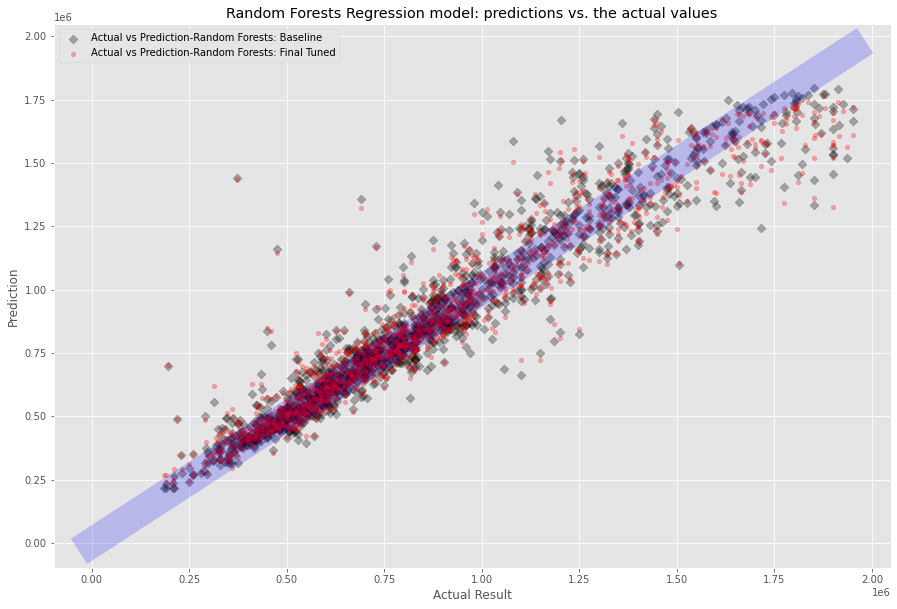

In [40]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_rfg, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction-Random Forests: Baseline')
plt.scatter(y_test,y_pred_rfg_cv_2, color='red', marker='o', s=20, alpha=0.3,label='Actual vs Prediction-Random Forests: Final Tuned')
plt.title('Random Forests Regression model: predictions vs. the actual values')
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'blue', linewidth=30, alpha=0.2)
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [41]:
final_rfg = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted_baseline': y_pred_rfg.round(3), 'SalePrice_Predicted_Tuned': y_pred_rfg_cv_2.round(3)})
final_rfg.head(30).sort_values(by='SalePrice_Actual', ascending=False)

,SalePrice_Actual,SalePrice_Predicted_baseline,SalePrice_Predicted_Tuned
437,1767539,1577777.75,1520763.068
253,1600000,1650818.00,1639632.501
2625,1566000,1624079.97,1558247.138
2170,1485000,1458961.86,1410666.173
1913,1463000,1267779.64,1324870.285
3237,1370000,1473630.88,1408854.072
1804,1320000,1125452.00,1100884.837
4358,1170000,1101922.48,1066476.215
1343,1005000,844817.00,879181.842
406,990000,1098007.28,1114715.277


## 10. Models next step:<a id='10_Models_next_step'></a>

Now, after building our 6th Model: Random Forests Regression, let's see if we can further improve our prediction using below algorithm:

 * Gradient-Boosting Regression
 

## 11. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))